In [2]:
from matplotlib import pyplot as plt
import matplotlib
import numpy as np
import pandas
from IPython.display import display

In [12]:
adult_df = pandas.read_csv("./data/adult.csv", index_col=0)
compas_df = pandas.read_csv("./data/compas.csv", index_col=0)
bank_df = pandas.read_csv("./data/bank.csv", index_col=0)
german_df = pandas.read_csv("./data/german.csv", index_col=0)


for df in [adult_df, compas_df, bank_df, german_df]:
    df["False Positive Rate Diff"] = df["False Positive Rate - Unprivileged"] - df["False Positive Rate - Privileged"]
    df["False Negative Rate Diff"] = df["False Negative Rate - Unprivileged"] - df["False Negative Rate - Privileged"]
    df["Accuracy Diff"] = df["Accuracy - Unprivileged"] - df["Accuracy - Privileged"]
    df["False Omission Rate Diff"] = df["False Omission Rate - Unprivileged"] - df["False Omission Rate - Privileged"]
    df["False Discovery Rate Diff"] = df["False Discovery Rate - Unprivileged"] - df["False Discovery Rate - Privileged"]
    df["Statistical Parity Diff"] = df["Unprivileged base Rate"] - df["Privileged base Rate"]
    df["F1 Score Diff"] = df["F1 Score - Unprivileged"] - df["F1 Score - Privileged"]
    for metric in df.columns:
        if "Num" in metric:
            df.drop(metric, axis=1, inplace=True)

In [11]:
def num_interventions(name):
    if name == "Logistic Regression" or name  == "Meta Classifier":
        return 0
    if name.count('+') == 0:
        return 1
    if name.count('+') == 1:
        return 2
    if name.count('+') == 2:
        return 3

In [16]:
no_int = []
one_int = []
two_int = []
three_int = []
for row in list(adult_df.index):
    if num_interventions(row) == 0:
        no_int.append(row)
    elif num_interventions(row) == 1:
        one_int.append(row)
    elif num_interventions(row) == 2:
        two_int.append(row)
    elif num_interventions(row) == 3:
        three_int.append(row)
        
print(no_int)
print(one_int)
print(two_int)
print(three_int)

['Logistic Regression']
['OP', 'DIR', 'EOP', 'CEOP', 'ROC', 'GFC', 'PR', 'EGR', 'GSR']
['OP + EOP', 'OP + CEOP', 'OP + ROC', 'OP + GFC', 'OP + PR', 'OP + EGR', 'OP + GSR', 'DIR + EOP', 'DIR + CEOP', 'DIR + ROC', 'DIR + GFC', 'DIR + PR', 'DIR + EGR', 'DIR + GSR', 'GFC + EOP', 'GFC + CEOP', 'GFC + ROC', 'PR + EOP', 'PR + CEOP', 'PR + ROC', 'EGR + EOP', 'EGR + CEOP', 'EGR + ROC', 'GSR + EOP', 'GSR + CEOP', 'GSR + ROC']
['OP + GFC + EOP', 'OP + GFC + CEOP', 'OP + GFC + ROC', 'OP + PR + EOP', 'OP + PR + CEOP', 'OP + PR + ROC', 'OP + EGR + EOP', 'OP + EGR + CEOP', 'OP + EGR + ROC', 'OP + GSR + EOP', 'OP + GSR + CEOP', 'OP + GSR + ROC', 'DIR + GFC + EOP', 'DIR + GFC + CEOP', 'DIR + GFC + ROC', 'DIR + PR + EOP', 'DIR + PR + CEOP', 'DIR + PR + ROC', 'DIR + EGR + EOP', 'DIR + EGR + CEOP', 'DIR + EGR + ROC', 'DIR + GSR + EOP', 'DIR + GSR + CEOP', 'DIR + GSR + ROC']


In [24]:
row_ordering = no_int + one_int + two_int + three_int
adult_df = adult_df.loc[row_ordering]
compas_df = compas_df.loc[row_ordering]
german_df = german_df.loc[row_ordering]
bank_df = bank_df.loc[row_ordering]

KeyError: "['OP', 'OP + EOP', 'OP + CEOP', 'OP + ROC', 'OP + GFC', 'OP + PR', 'OP + EGR', 'OP + GSR', 'OP + GFC + EOP', 'OP + GFC + CEOP', 'OP + GFC + ROC', 'OP + PR + EOP', 'OP + PR + CEOP', 'OP + PR + ROC', 'OP + EGR + EOP', 'OP + EGR + CEOP', 'OP + EGR + ROC', 'OP + GSR + EOP', 'OP + GSR + CEOP', 'OP + GSR + ROC'] not in index"

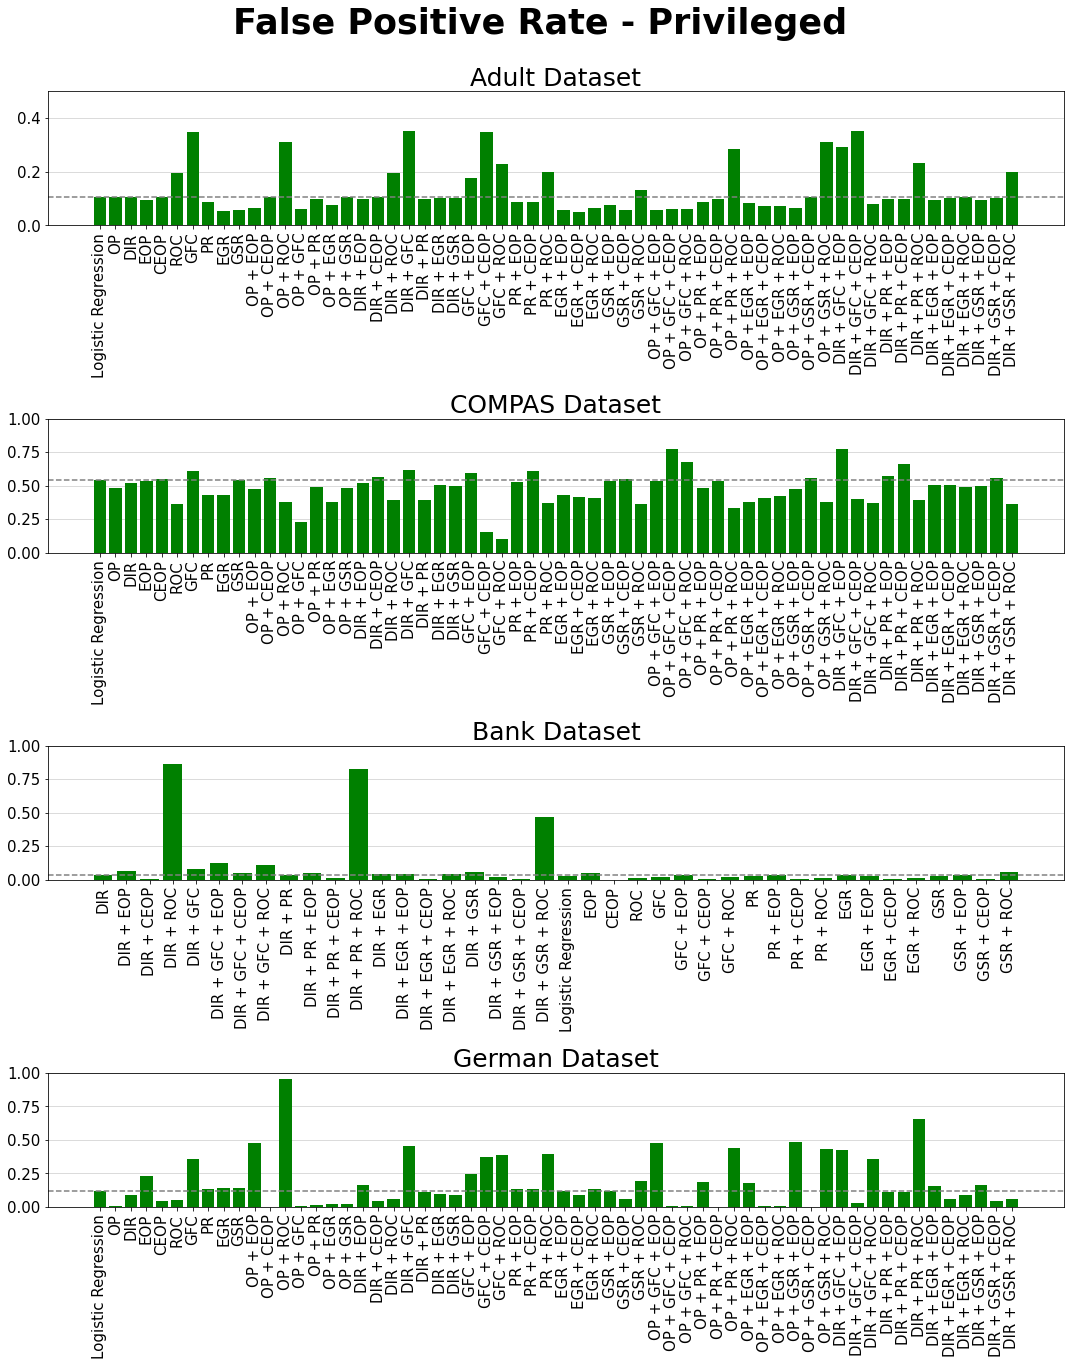

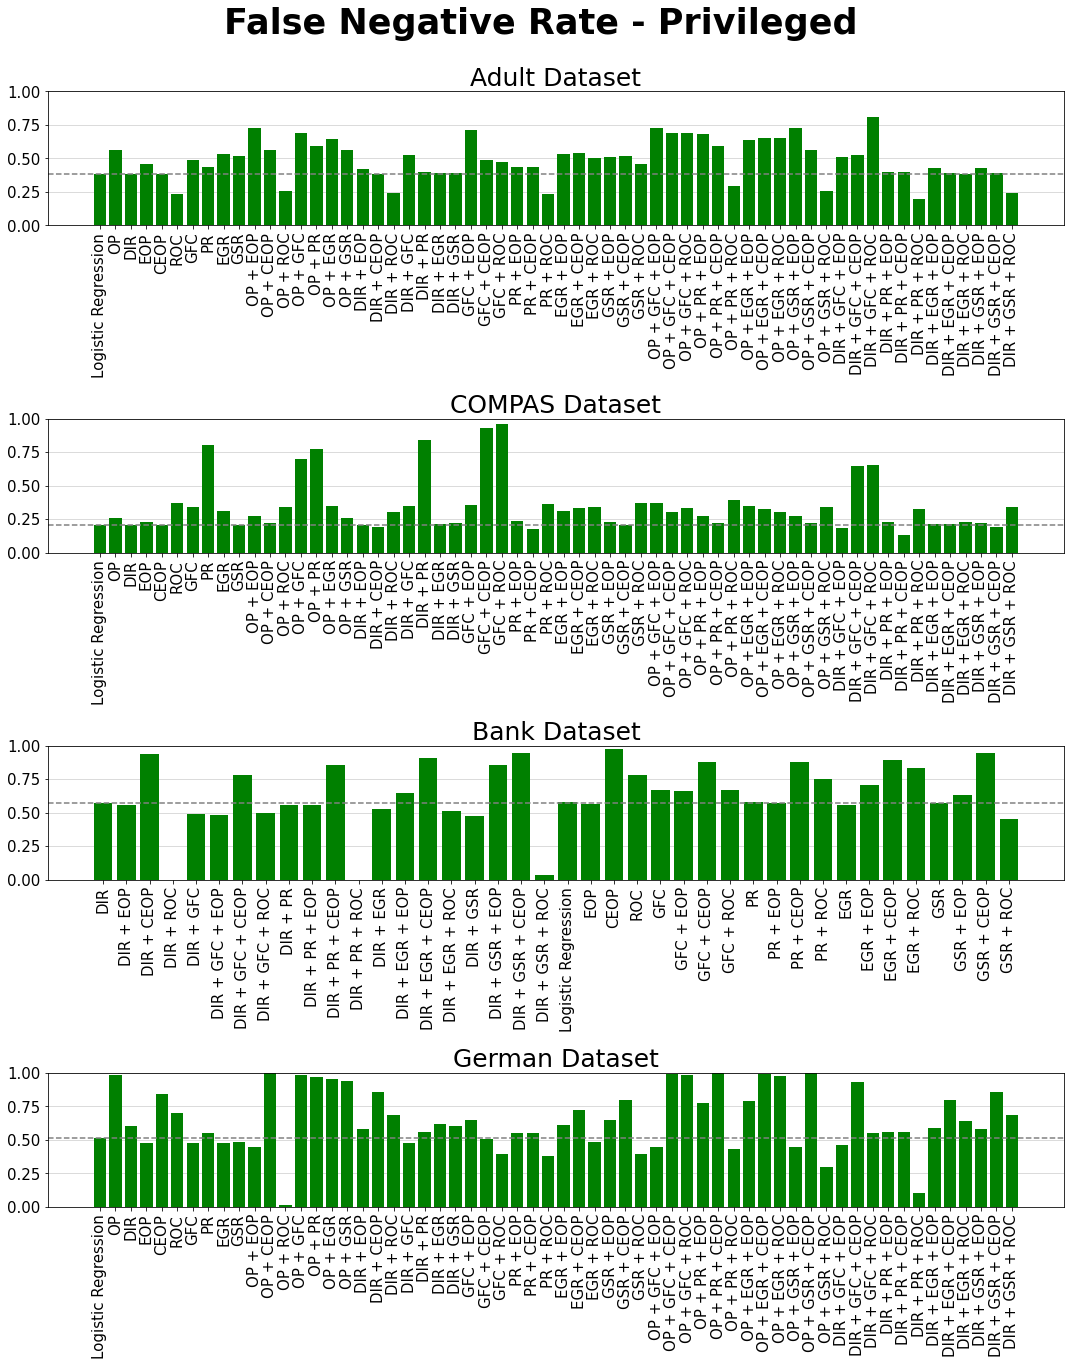

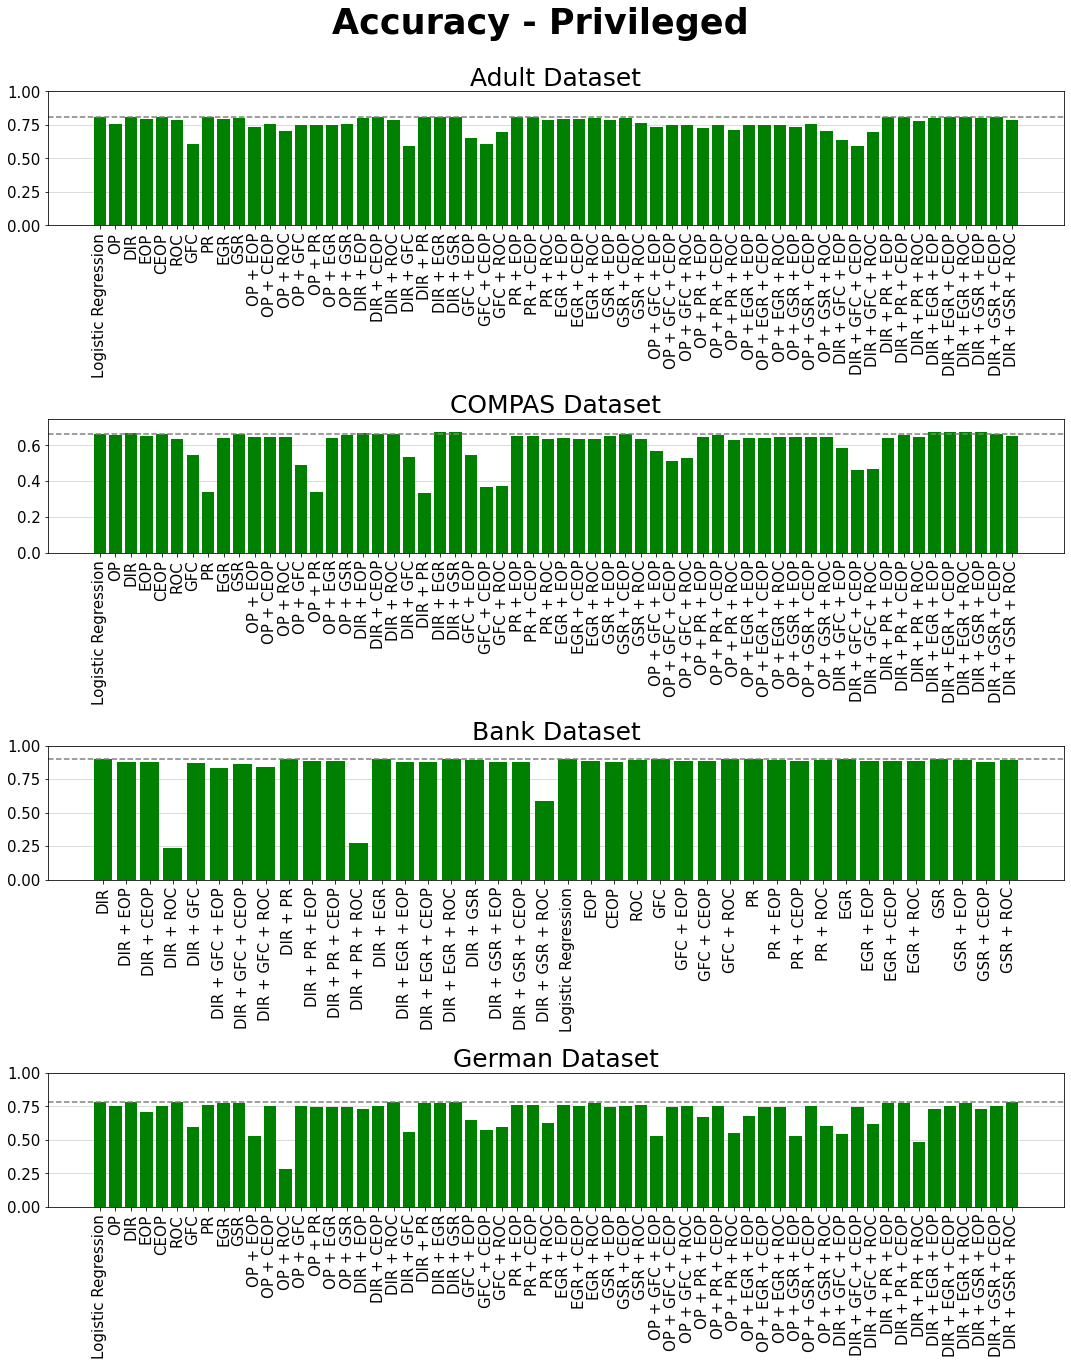

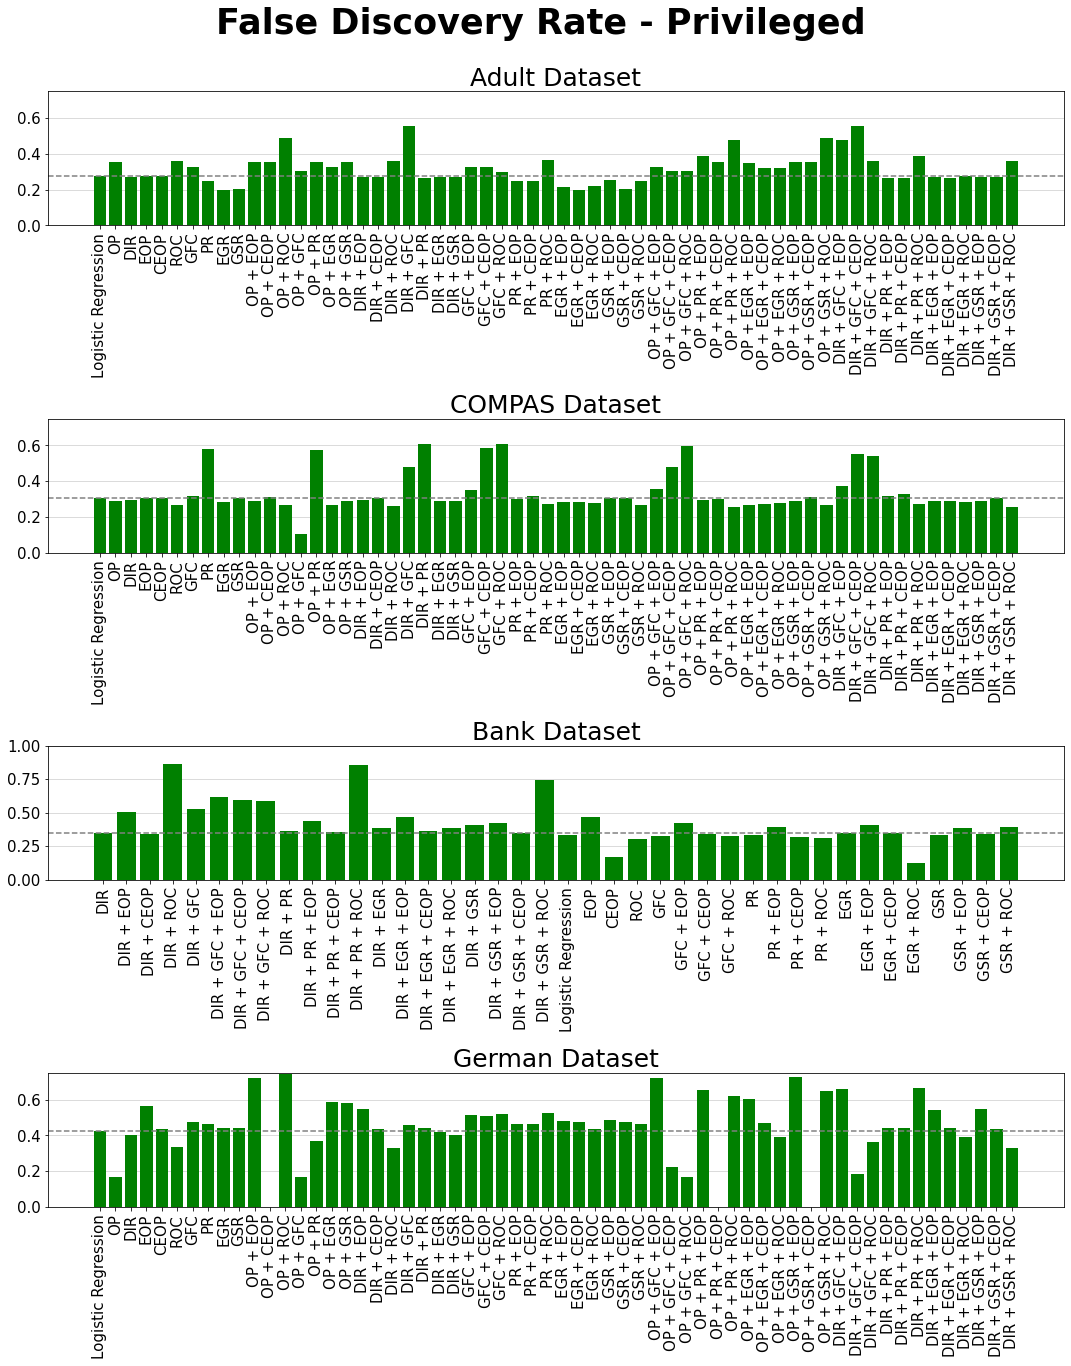

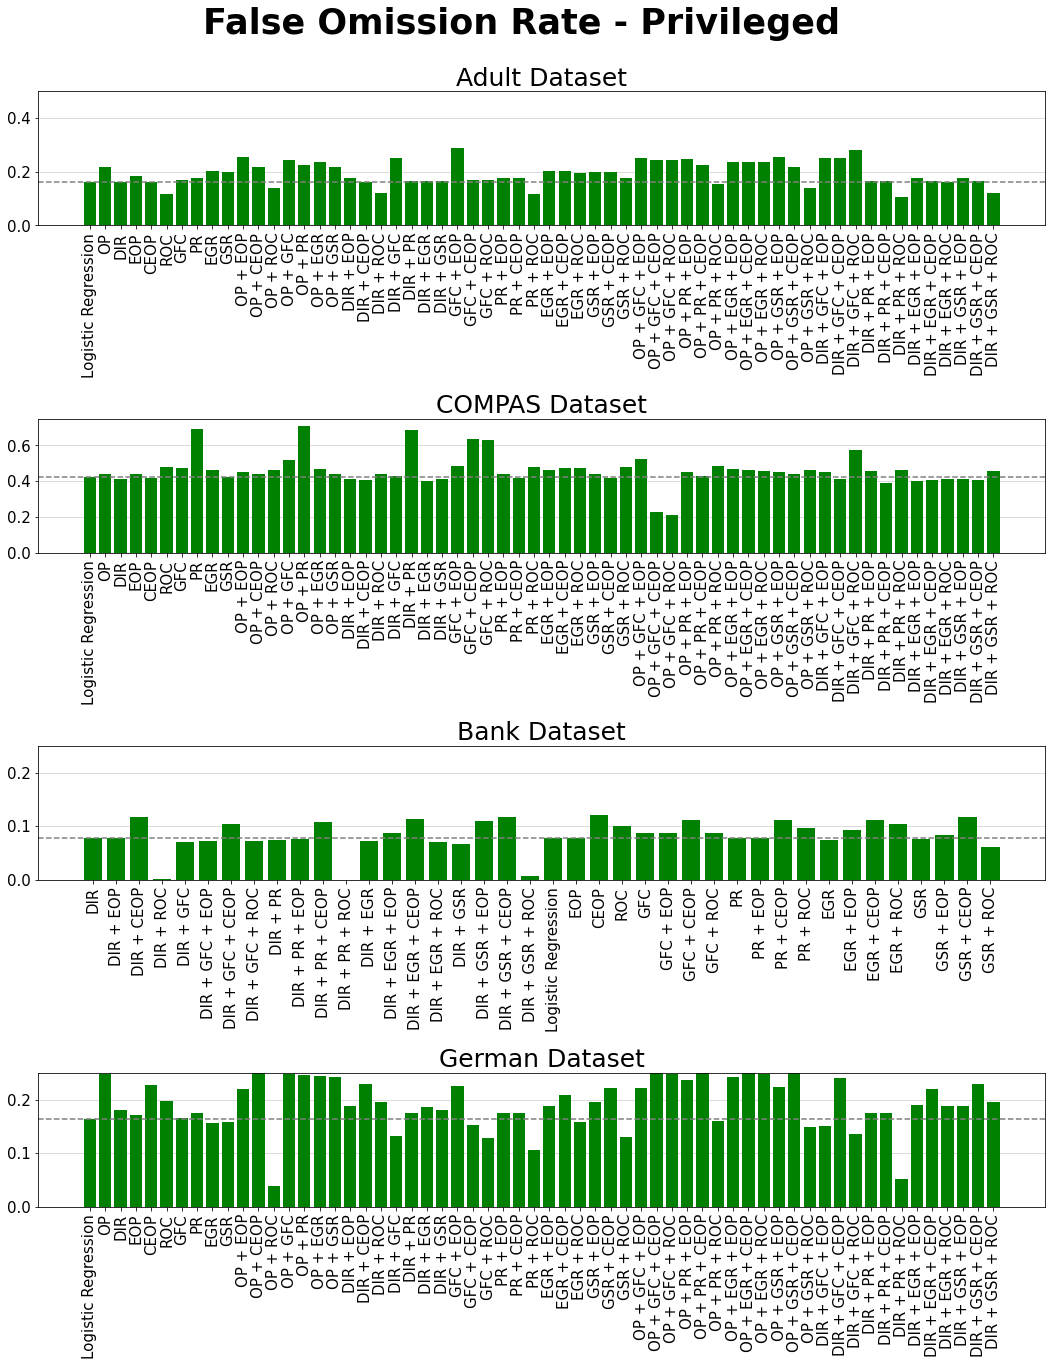

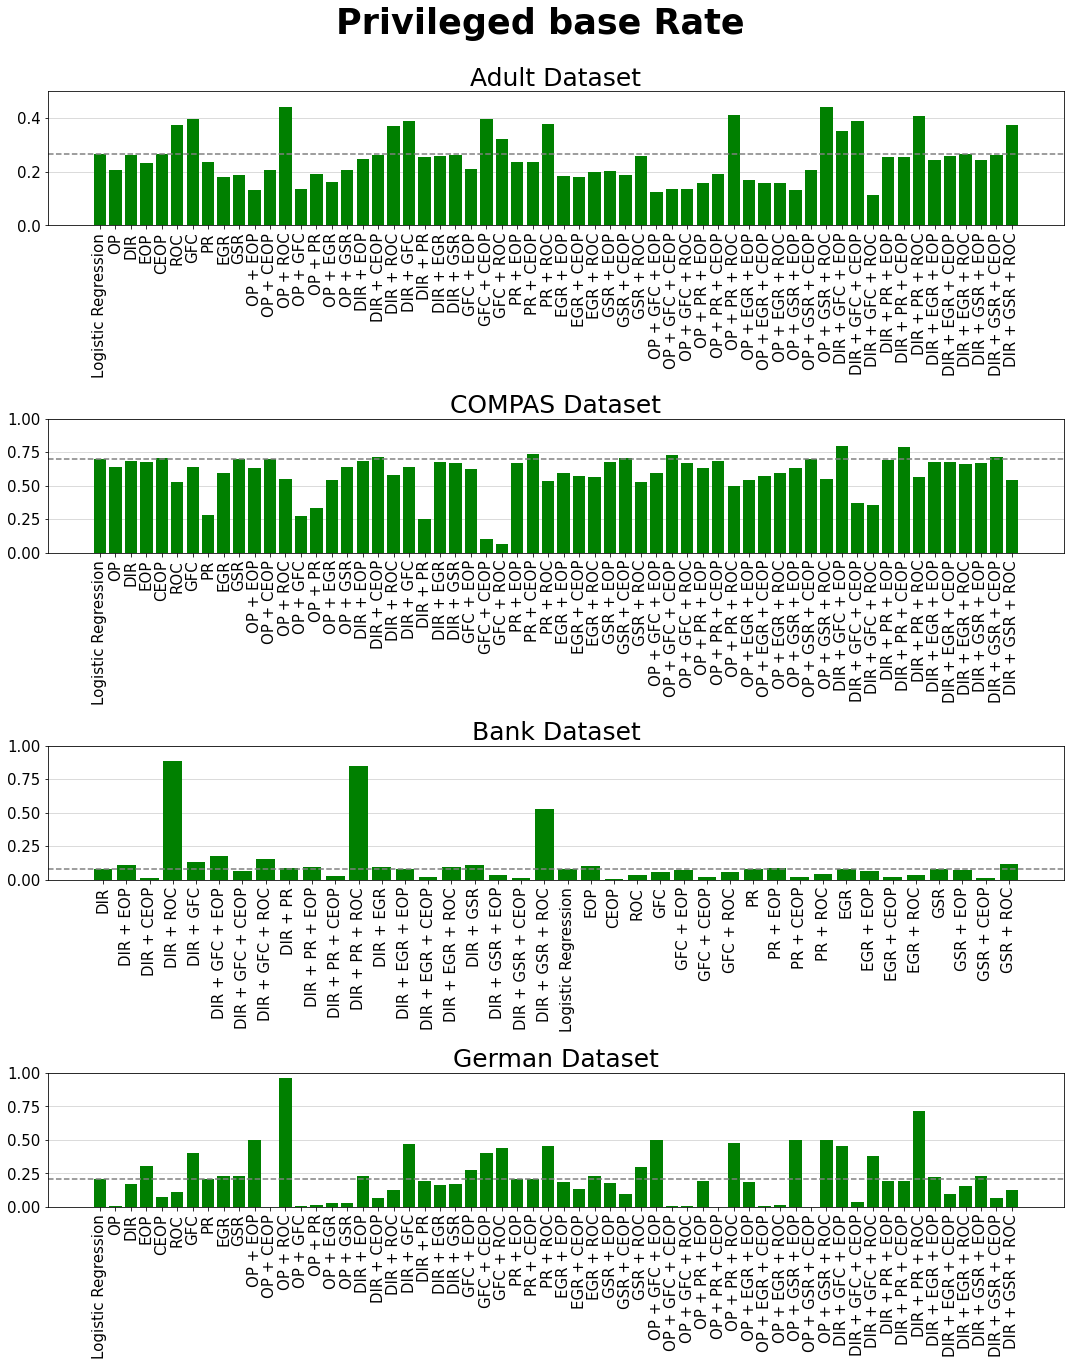

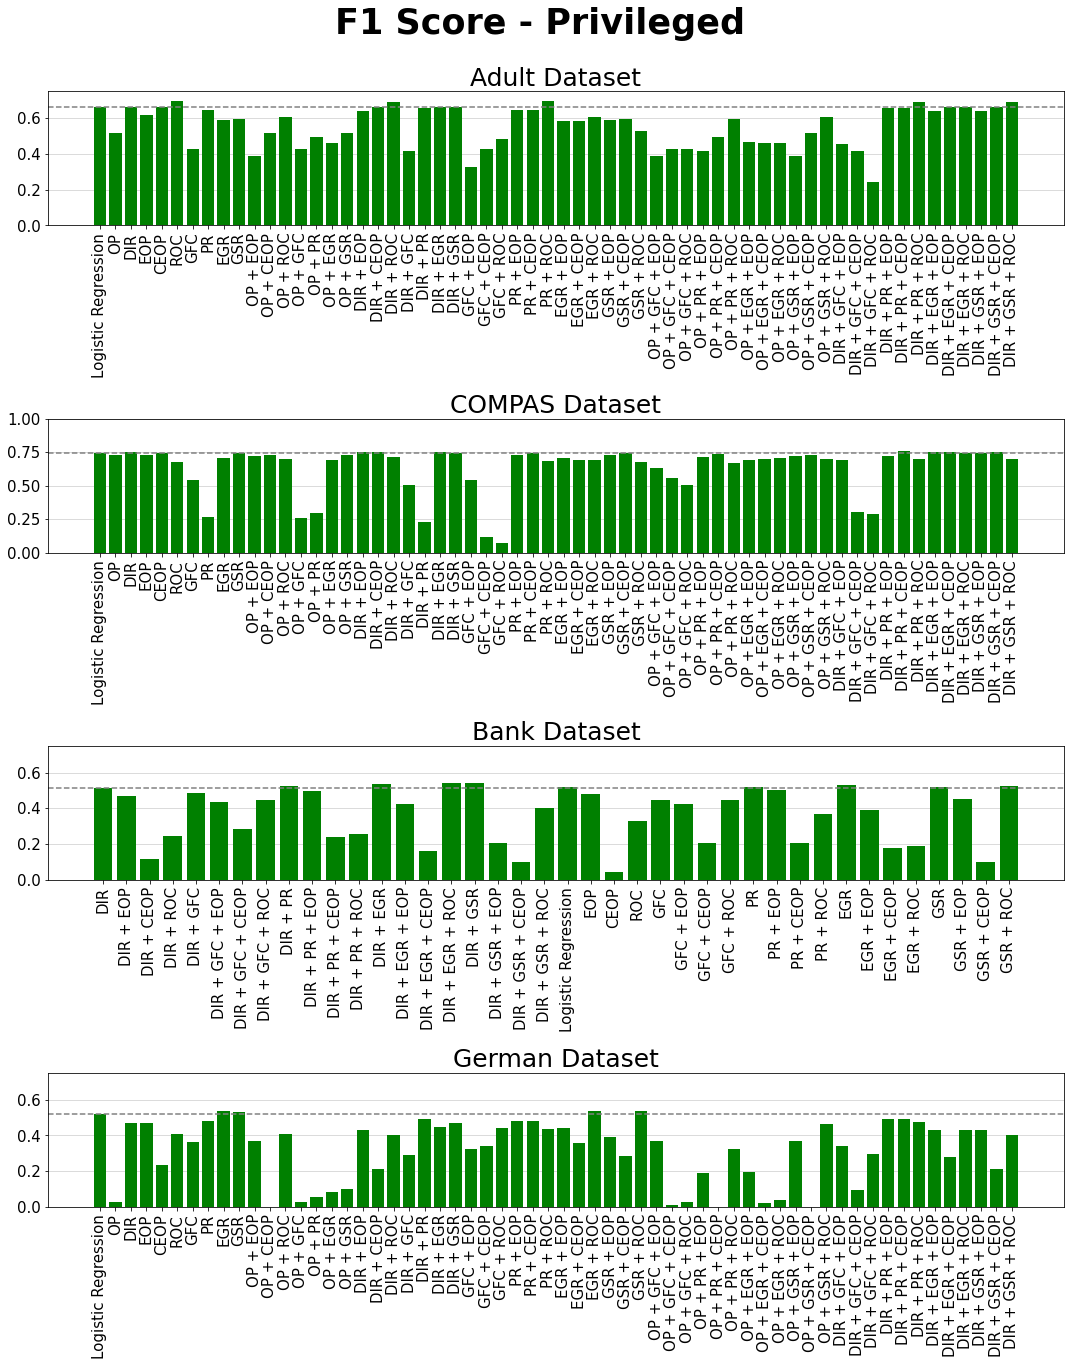

In [25]:
def create_graph(fairness_metric):
    def get_limits(max_val):
        if max_val < 0.25:
            return [0.0,0.25]
        if max_val < 0.5:
            return [0.0,0.5]
        if max_val < 0.75:
            return [0.0,0.75]
        return [0.0,1.0]
    
    fig, ax = plt.subplots(4, figsize=(15, 20))
    
    ax[0].patch.set_facecolor('white')
    ax[0].patch.set_alpha(1.0)
    ax[0].set_title("Adult Dataset", size=25)
    plt.rcParams.update({'font.size': 15})
    
    vals = list(adult_df[fairness_metric])
    Labels=list(adult_df.index)
    y_pos=np.arange(len(Labels))
    plt.sca(ax[0])
    plt.xticks(y_pos, Labels)
    #ax[0].bar(y_pos - 0.2, unpriv,width=0.4, color = 'blue' , label='Unprivileged')
    ax[0].bar(y_pos, vals, color = 'green',label = 'Privileged')
    #ax[0].legend(('Unprivileged','Privileged'), loc='upper right')
    ax[0].axhline(y = vals[0], color = 'grey', linestyle = 'dashed')
    ax[0].set_ylim(get_limits(max(vals)))
    
    
    ax[1].patch.set_facecolor('white')
    ax[1].patch.set_alpha(1.0)
    ax[1].set_title("COMPAS Dataset", size=25)
    plt.rcParams.update({'font.size': 15})
    
    vals = list(compas_df[fairness_metric])
    Labels=list(compas_df.index)
    y_pos=np.arange(len(Labels))
    plt.sca(ax[1])
    plt.xticks(y_pos, Labels)
    #ax[1].bar(y_pos - 0.2, unpriv,width=0.4, color = 'blue' , label='Unprivileged')
    ax[1].bar(y_pos, vals, color = 'green',label = 'Privileged')
    #ax[1].legend(('Unprivileged','Privileged'), loc='upper right')
    ax[1].axhline(y = vals[0], color = 'grey', linestyle = 'dashed')
    ax[1].set_ylim(get_limits(max(vals)))
    
    
    ax[2].patch.set_facecolor('white')
    ax[2].patch.set_alpha(1.0)
    ax[2].set_title("Bank Dataset", size=25)
    plt.rcParams.update({'font.size': 15})
    
    vals = list(bank_df[fairness_metric])
    Labels=list(bank_df.index)
    y_pos=np.arange(len(Labels))
    plt.sca(ax[2])
    plt.xticks(y_pos, Labels)
    #ax[2].bar(y_pos - 0.2, unpriv,width=0.4, color = 'blue' , label='Unprivileged')
    ax[2].bar(y_pos, vals, color = 'green',label = 'Privileged')
    #ax[2].legend(('Unprivileged','Privileged'), loc='upper right')
    ax[2].axhline(y = vals[0], color = 'grey', linestyle = 'dashed')
    ax[2].set_ylim(get_limits(max(vals)))
    
    
    ax[3].patch.set_facecolor('white')
    ax[3].patch.set_alpha(1.0)
    ax[3].set_title("German Dataset", size=25)
    plt.rcParams.update({'font.size': 15})
    
    vals = list(german_df[fairness_metric])
    Labels=list(german_df.index)
    y_pos=np.arange(len(Labels))
    plt.sca(ax[3])
    plt.xticks(y_pos, Labels)
    #ax[3].bar(y_pos - 0.2, unpriv,width=0.4, color = 'blue' , label='Unprivileged')
    ax[3].bar(y_pos, vals, color = 'green',label = 'Privileged')
    #ax[3].legend(('Unprivileged','Privileged'), loc='upper right')
    ax[3].axhline(y = vals[0], color = 'grey', linestyle = 'dashed')
    ax[3].set_ylim(get_limits(max(vals)))
        
    for ax in fig.axes:
        plt.sca(ax)
        plt.xticks(rotation=90)
        ax.yaxis.grid(color="lightgrey")
        ax.set_axisbelow(True)
    
    fig.tight_layout(rect=[0, 0.03, 1, 0.95])
    ax.xaxis.label.set_size(20)
    fig.suptitle(fairness_metric,fontweight="bold",fontsize=35)
    fig.patch.set_alpha(1.0)
    
    plt.savefig("R3/" + fairness_metric + ".png", bbox_inches='tight', )

create_graph("False Positive Rate - Privileged")
create_graph("False Negative Rate - Privileged")
create_graph("Accuracy - Privileged")
create_graph("False Discovery Rate - Privileged")
create_graph("False Omission Rate - Privileged")
create_graph("Privileged base Rate")
create_graph("F1 Score - Privileged")

C:\Users\Bhavya\AppData\Local\Temp/ipykernel_8768/634128679.py:32: MatplotlibDeprecationWarning: hatch must consist of a string of "*+-./OX\ox|" or None, but found the following invalid values " ". Passing invalid values is deprecated since 3.4 and will become an error in 3.7.
  plt.bar(intervention, y_vals[i], color='g', hatch=pattern[i], zorder=3)
C:\Users\Bhavya\AppData\Local\Temp/ipykernel_8768/634128679.py:32: MatplotlibDeprecationWarning: hatch must consist of a string of "*+-./OX\ox|" or None, but found the following invalid values " ". Passing invalid values is deprecated since 3.4 and will become an error in 3.7.
  plt.bar(intervention, y_vals[i], color='g', hatch=pattern[i], zorder=3)
C:\Users\Bhavya\AppData\Local\Temp/ipykernel_8768/634128679.py:32: MatplotlibDeprecationWarning: hatch must consist of a string of "*+-./OX\ox|" or None, but found the following invalid values " ". Passing invalid values is deprecated since 3.4 and will become an error in 3.7.
  plt.bar(interven

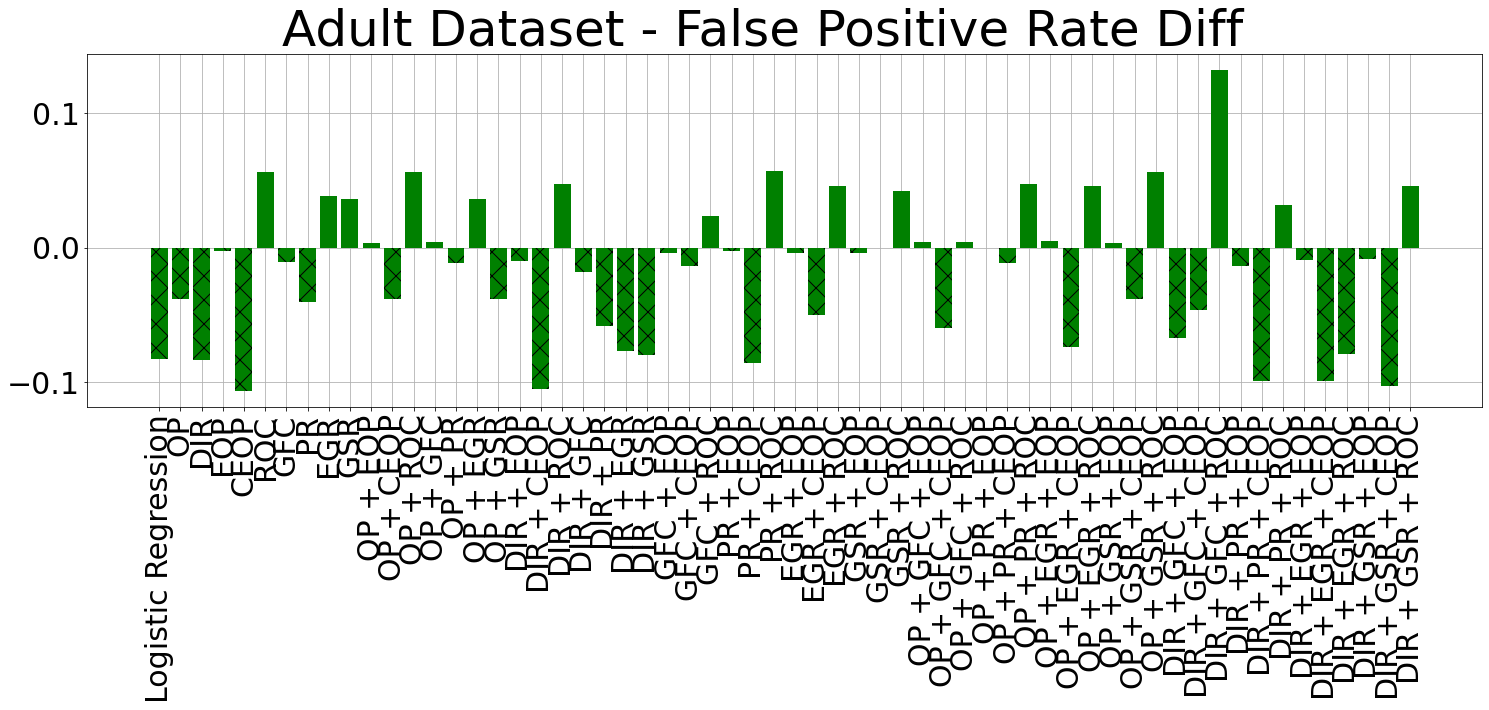

'create_value_graph("False Negative Rate Diff")\ncreate_value_graph("Accuracy Diff")\ncreate_value_graph("False Discovery Rate Diff")\ncreate_value_graph("False Omission Rate Diff")\ncreate_value_graph("Statistical Parity Diff")\ncreate_value_graph("F1 Score Diff")'

In [26]:
def create_value_graph(fairness_metric):
    pattern = []
    for val in adult_df[fairness_metric]:
        if val > 0:
            pattern.append(' ')
        elif val < 0:
            pattern.append('x')
    for val in compas_df[fairness_metric]:
        if val > 0:
            pattern.append(' ')
        elif val < 0:
            pattern.append('x')
    for val in bank_df[fairness_metric]:
        if val > 0:
            pattern.append(' ')
        elif val < 0:
            pattern.append('x')
    for val in german_df[fairness_metric]:
        if val > 0:
            pattern.append(' ')
        elif val < 0:
            pattern.append('x')
    fig = plt.figure(figsize=(25,6.5))
    fig.patch.set_facecolor('white')
    fig.patch.set_alpha(1.0)
    fig.suptitle("Adult Dataset - " + fairness_metric, fontsize=50)
    plt.rcParams.update({'font.size': 30})
    #plt.title("Adult Dataset - " + fairness_metric)
    y_vals = adult_df[fairness_metric]#abs(adult_df[fairness_metric])
    #plt.bar(adult_df["Adult"], y_vals, hatch=pattern)
    for intervention, i in zip(adult_df.index, range(len(adult_df.index))):
        plt.bar(intervention, y_vals[i], color='g', hatch=pattern[i], zorder=3)
    plt.xticks(rotation=90)
    plt.grid(zorder=0)
    plt.savefig("R3/Adult Dataset - " + fairness_metric + ".png", bbox_inches='tight', )
    plt.show()

create_value_graph("False Positive Rate Diff")
'''create_value_graph("False Negative Rate Diff")
create_value_graph("Accuracy Diff")
create_value_graph("False Discovery Rate Diff")
create_value_graph("False Omission Rate Diff")
create_value_graph("Statistical Parity Diff")
create_value_graph("F1 Score Diff")'''

C:\Users\Bhavya\AppData\Local\Temp/ipykernel_8768/210606474.py:39: MatplotlibDeprecationWarning: hatch must consist of a string of "*+-./OX\ox|" or None, but found the following invalid values " ". Passing invalid values is deprecated since 3.4 and will become an error in 3.7.
  ax[0].bar(y_pos[i], abs(vals[i]), color='g', hatch=pattern, zorder=3)
C:\Users\Bhavya\AppData\Local\Temp/ipykernel_8768/210606474.py:57: MatplotlibDeprecationWarning: hatch must consist of a string of "*+-./OX\ox|" or None, but found the following invalid values " ". Passing invalid values is deprecated since 3.4 and will become an error in 3.7.
  ax[1].bar(y_pos[i], abs(vals[i]), color='g', hatch=pattern, zorder=3)
C:\Users\Bhavya\AppData\Local\Temp/ipykernel_8768/210606474.py:75: MatplotlibDeprecationWarning: hatch must consist of a string of "*+-./OX\ox|" or None, but found the following invalid values " ". Passing invalid values is deprecated since 3.4 and will become an error in 3.7.
  ax[2].bar(y_pos[i], 

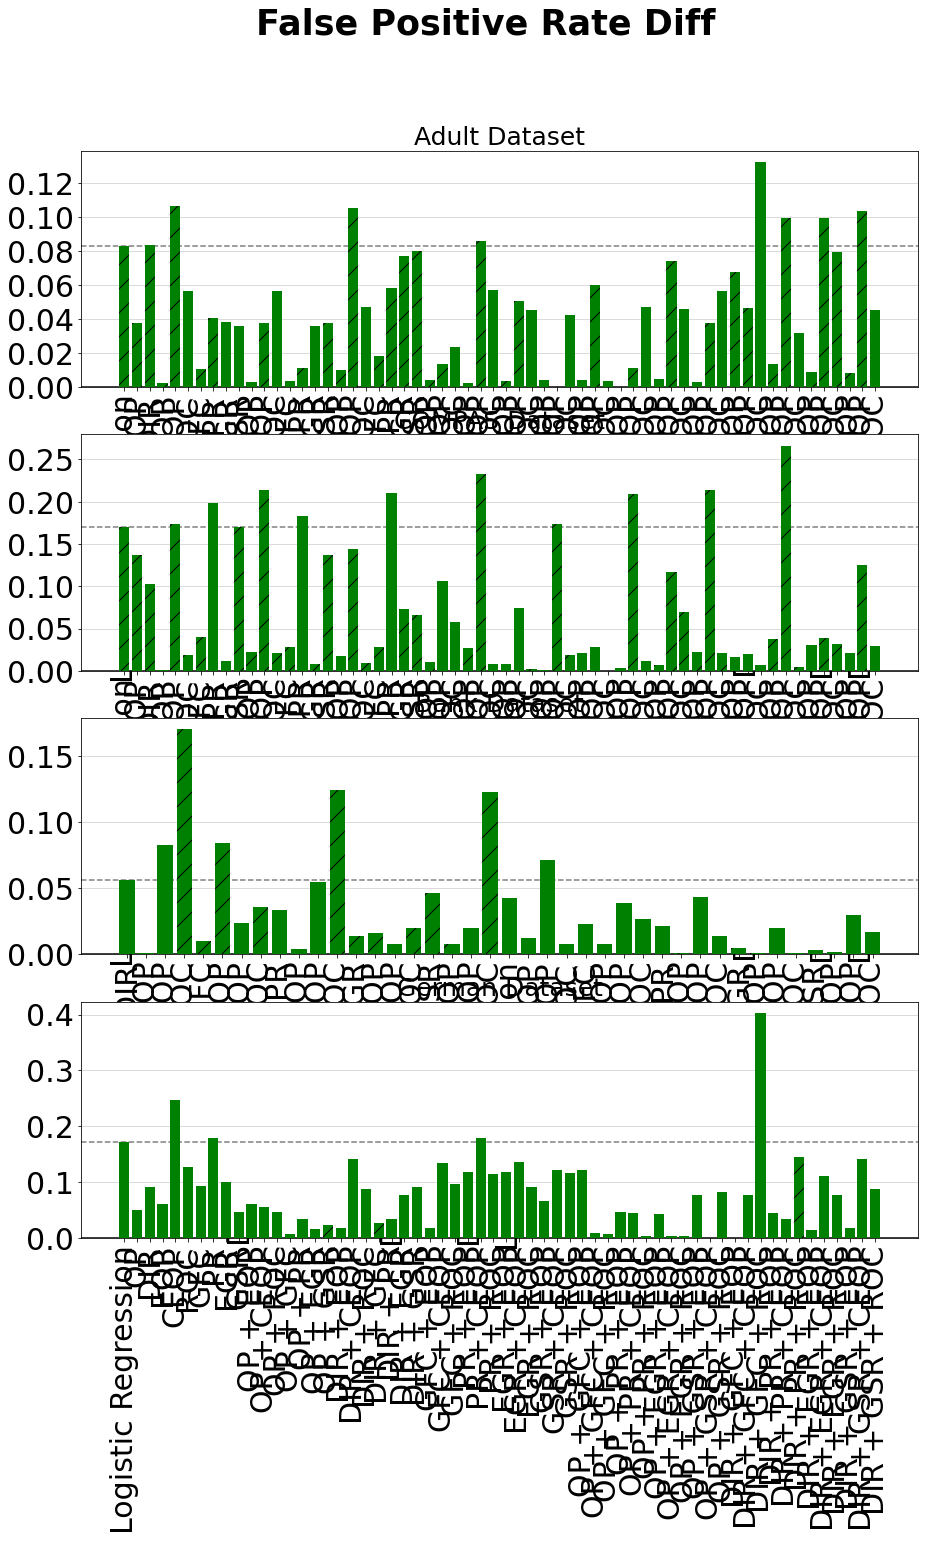

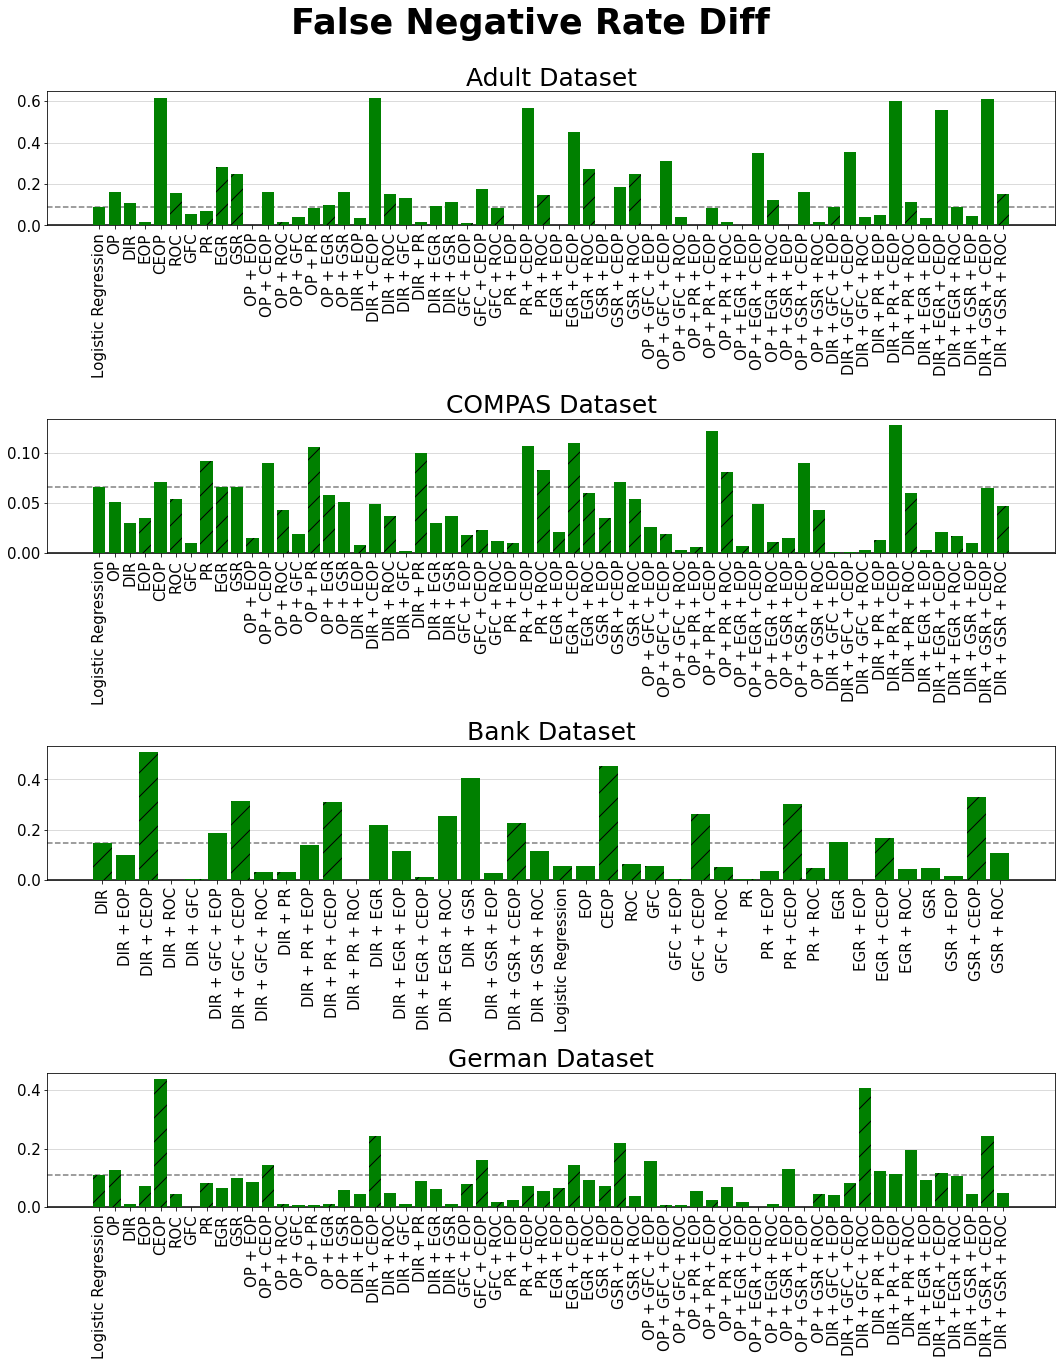

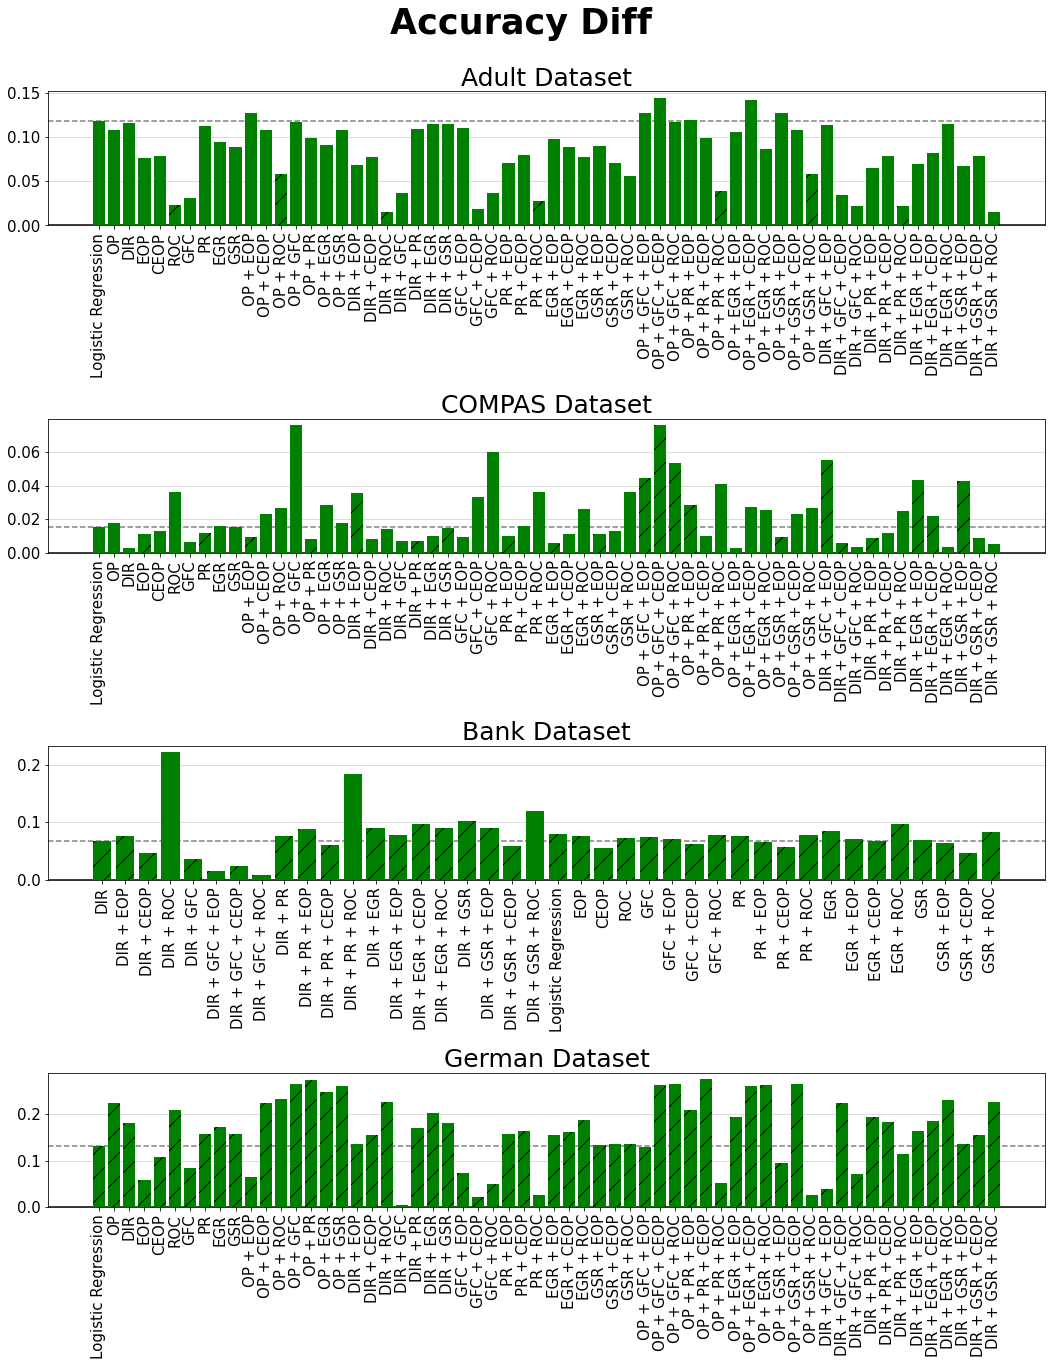

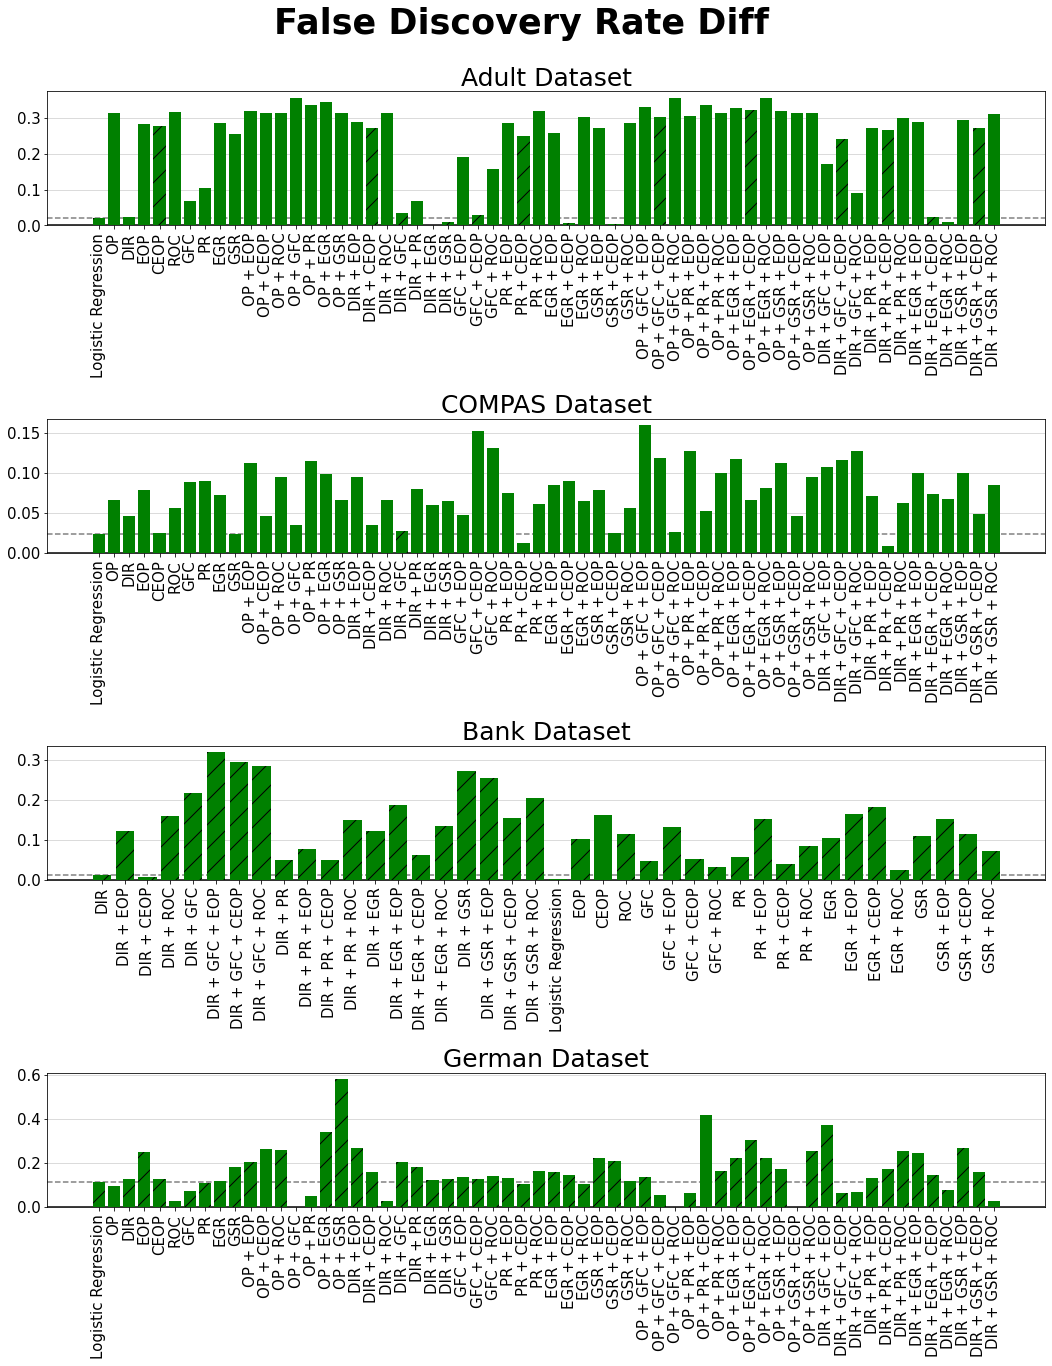

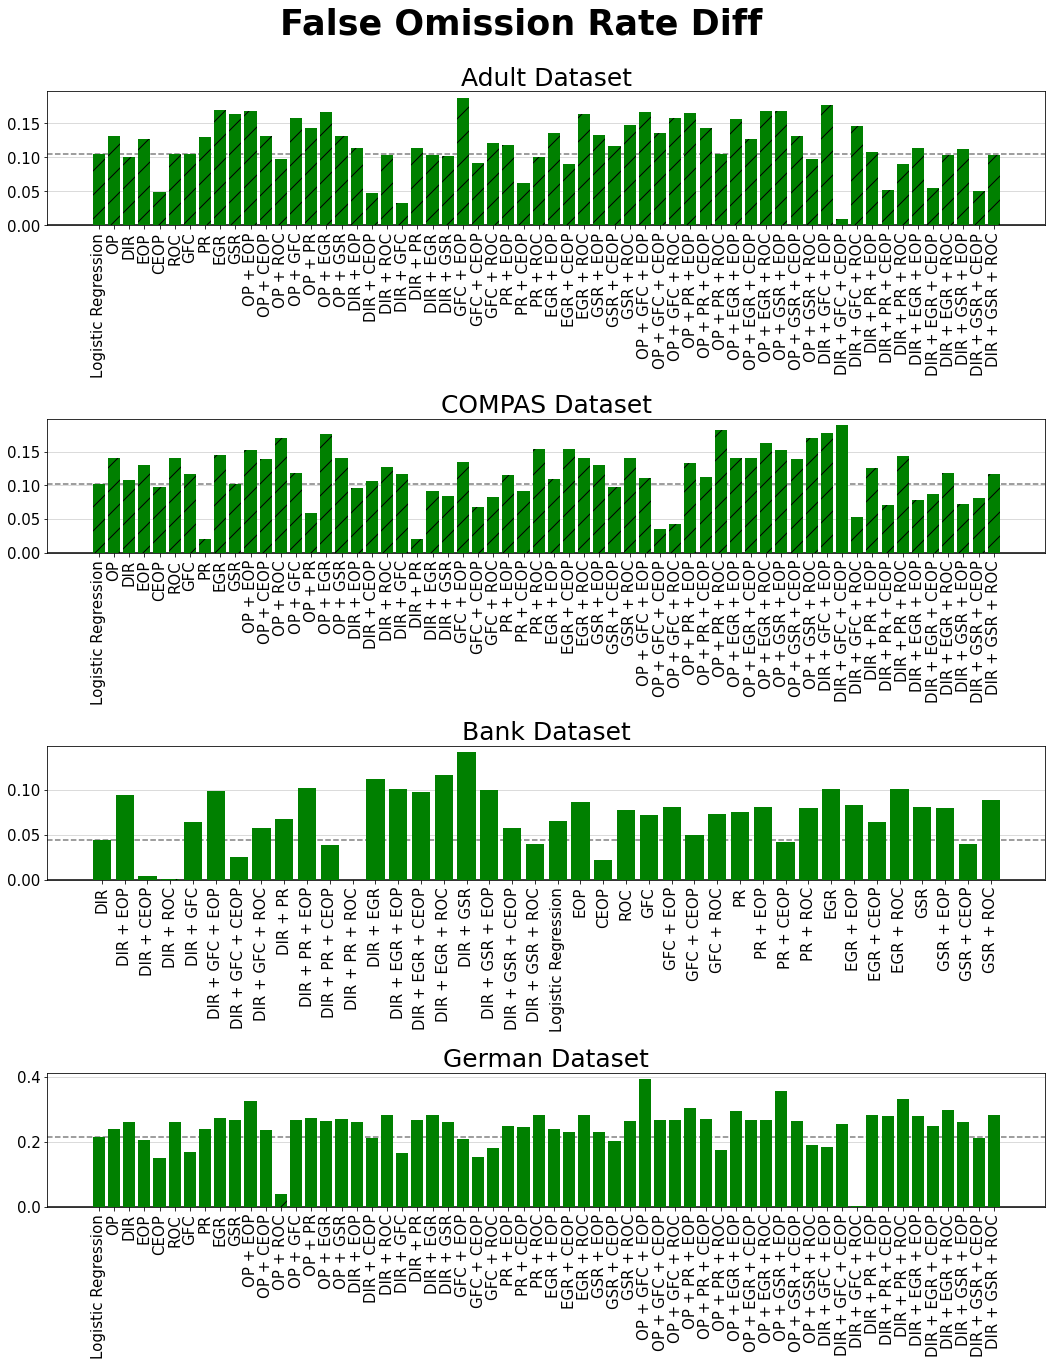

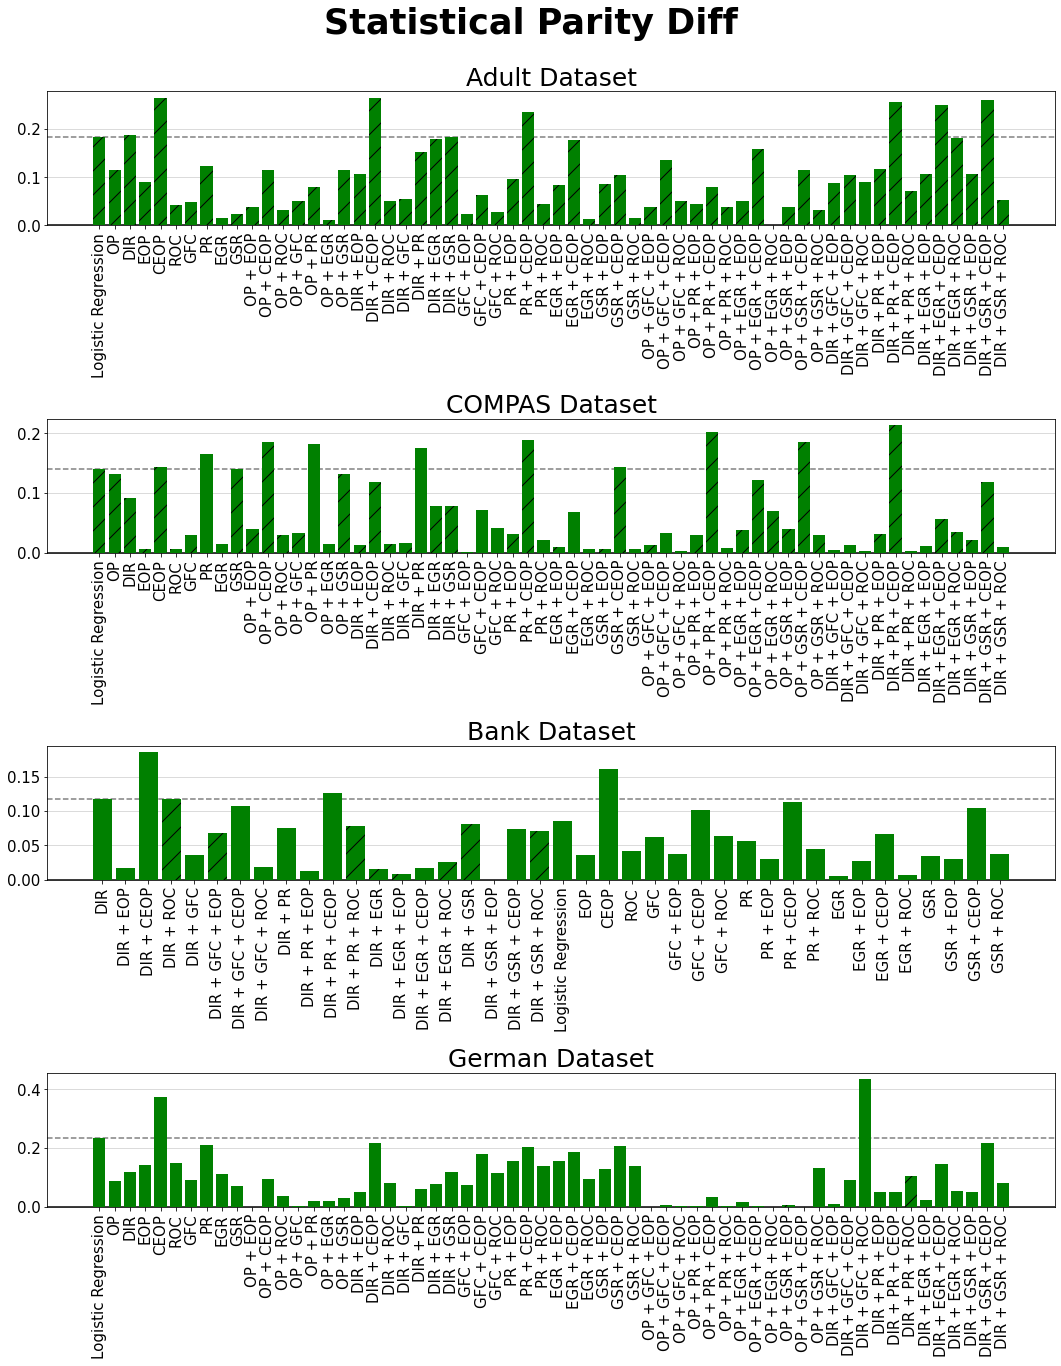

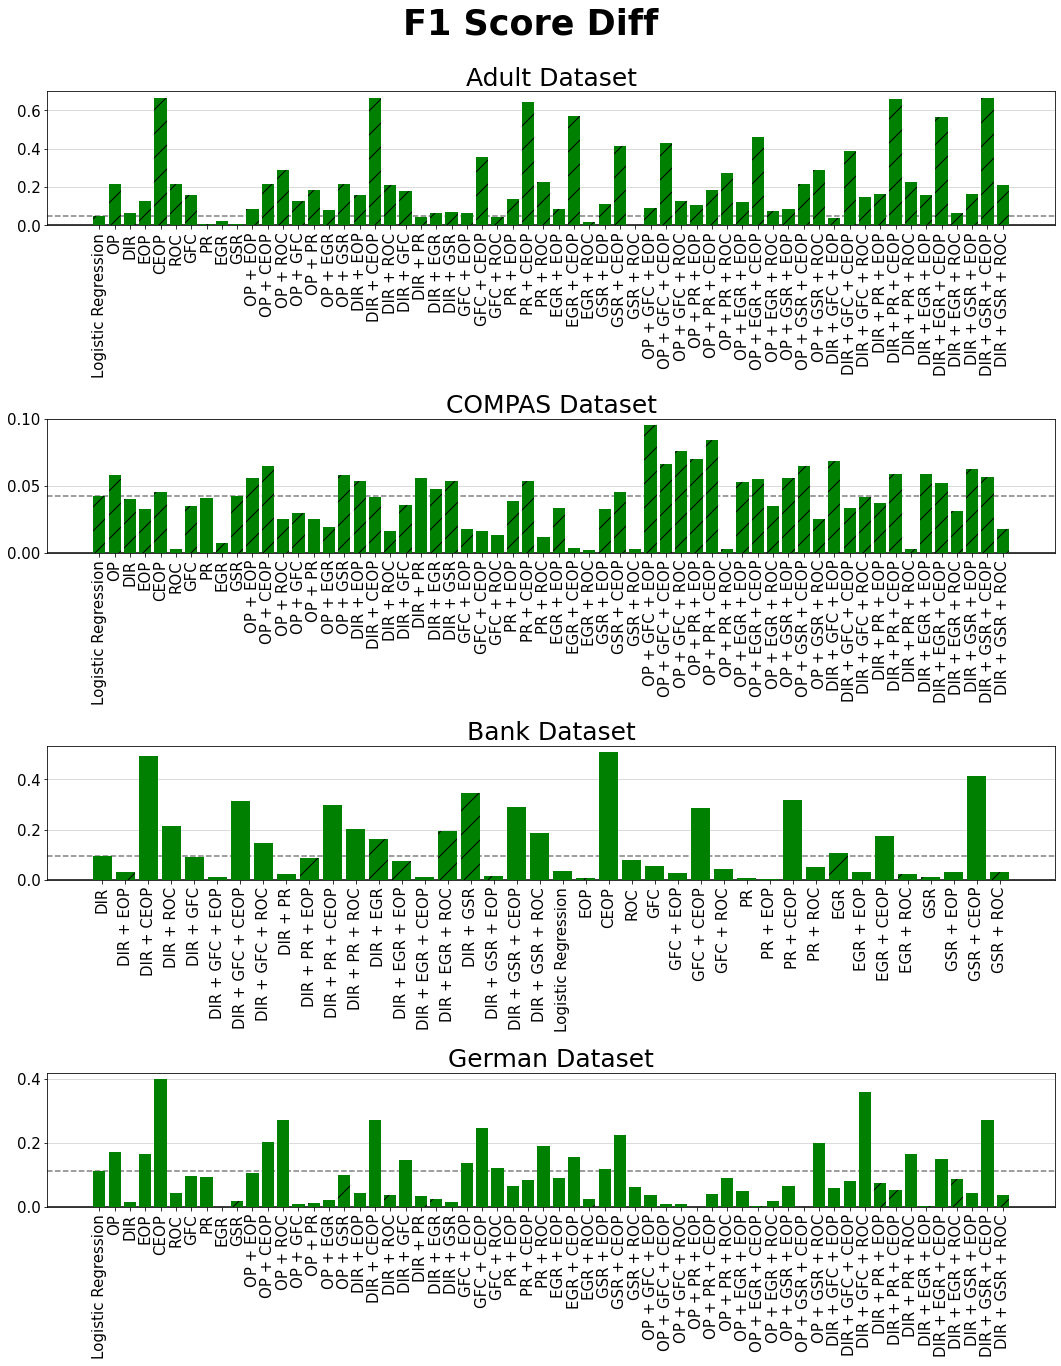

In [27]:
def create_diff_graph(fairness_metric):
    pattern = []
    for val in adult_df[fairness_metric]:
        if val > 0:
            pattern.append(' ')
        elif val < 0:
            pattern.append('x')
    for val in compas_df[fairness_metric]:
        if val > 0:
            pattern.append(' ')
        elif val < 0:
            pattern.append('x')
    for val in bank_df[fairness_metric]:
        if val > 0:
            pattern.append(' ')
        elif val < 0:
            pattern.append('x')
    for val in german_df[fairness_metric]:
        if val > 0:
            pattern.append(' ')
        elif val < 0:
            pattern.append('x')
    
    
    fig, ax = plt.subplots(4, figsize=(15, 20))
    
    ax[0].patch.set_facecolor('white')
    ax[0].patch.set_alpha(1.0)
    ax[0].set_title("Adult Dataset", size=25)
    plt.rcParams.update({'font.size': 15})
    
    vals = list(adult_df[fairness_metric])
    Labels=list(adult_df.index)
    y_pos=np.arange(len(Labels))
    plt.sca(ax[0])
    plt.xticks(y_pos, Labels)
    for i in range(len(adult_df.index)):
        pattern = "/" if vals[i] < 0 else " "
        ax[0].bar(y_pos[i], abs(vals[i]), color='g', hatch=pattern, zorder=3)
    #ax[0].bar(y_pos, vals, color = 'green',label = 'Privileged')
    ax[0].axhline(y = abs(vals[0]), color = 'grey', linestyle = 'dashed')
    ax[0].axhline(y = 0, color = 'black', linestyle = 'solid')
    
    
    ax[1].patch.set_facecolor('white')
    ax[1].patch.set_alpha(1.0)
    ax[1].set_title("COMPAS Dataset", size=25)
    plt.rcParams.update({'font.size': 15})
    
    vals = list(compas_df[fairness_metric])
    Labels=list(compas_df.index)
    y_pos=np.arange(len(Labels))
    plt.sca(ax[1])
    plt.xticks(y_pos, Labels)
    for i in range(len(compas_df.index)):
        pattern = "/" if vals[i] < 0 else " "
        ax[1].bar(y_pos[i], abs(vals[i]), color='g', hatch=pattern, zorder=3)
    #ax[1].bar(y_pos, vals, color = 'green',label = 'Privileged')
    ax[1].axhline(y = abs(vals[0]), color = 'grey', linestyle = 'dashed')
    ax[1].axhline(y = 0, color = 'black', linestyle = 'solid')
    
    
    ax[2].patch.set_facecolor('white')
    ax[2].patch.set_alpha(1.0)
    ax[2].set_title("Bank Dataset", size=25)
    plt.rcParams.update({'font.size': 15})
    
    vals = list(bank_df[fairness_metric])
    Labels=list(bank_df.index)
    y_pos=np.arange(len(Labels))
    plt.sca(ax[2])
    plt.xticks(y_pos, Labels)
    for i in range(len(bank_df.index)):
        pattern = "/" if vals[i] < 0 else " "
        ax[2].bar(y_pos[i], abs(vals[i]), color='g', hatch=pattern, zorder=3)
    #ax[2].bar(y_pos, vals, color = 'green',label = 'Privileged')
    ax[2].axhline(y = abs(vals[0]), color = 'grey', linestyle = 'dashed')
    ax[2].axhline(y = 0, color = 'black', linestyle = 'solid')
    
    
    ax[3].patch.set_facecolor('white')
    ax[3].patch.set_alpha(1.0)
    ax[3].set_title("German Dataset", size=25)
    plt.rcParams.update({'font.size': 15})
    
    vals = list(german_df[fairness_metric])
    Labels=list(german_df.index)
    y_pos=np.arange(len(Labels))
    plt.sca(ax[3])
    plt.xticks(y_pos, Labels)
    for i in range(len(german_df.index)):
        pattern = "/" if vals[i] < 0 else " "
        ax[3].bar(y_pos[i], abs(vals[i]), color='g', hatch=pattern, zorder=3)
    #ax[3].bar(y_pos, vals, color = 'green',label = 'Privileged')
    ax[3].axhline(y = abs(vals[0]), color = 'grey', linestyle = 'dashed')
    ax[3].axhline(y = 0, color = 'black', linestyle = 'solid')
        
    for ax in fig.axes:
        plt.sca(ax)
        plt.xticks(rotation=90)
        ax.yaxis.grid(color="lightgrey")
        ax.set_axisbelow(True)
    
    fig.tight_layout(rect=[0, 0.03, 1, 0.95])
    ax.xaxis.label.set_size(20)
    fig.suptitle(fairness_metric,fontweight="bold",fontsize=35)
    fig.patch.set_alpha(1.0)
    
    plt.savefig("R3/" + fairness_metric + ".png", bbox_inches='tight', )
    
create_diff_graph("False Positive Rate Diff")
create_diff_graph("False Negative Rate Diff")
create_diff_graph("Accuracy Diff")
create_diff_graph("False Discovery Rate Diff")
create_diff_graph("False Omission Rate Diff")
create_diff_graph("Statistical Parity Diff")
create_diff_graph("F1 Score Diff")

In [93]:
int_df = pandas.DataFrame(columns=['% Worse Than Base', 'Priv worse than Unpriv'])

total_base_comparison = np.zeros((0,10))
total_priv = np.zeros((0,7))
diffs = [metric for metric in adult_df.columns if "Diff" in metric]

#def get_table_metric_for_df(df):
for df in [adult_df, compas_df, bank_df, german_df]:
    base = df.iloc[0]
    base_abs = abs(df.loc[df.index[0],diffs])
    for i in df.index:
        privs = df.loc[i, diffs] > 0
        total_priv = np.vstack((total_priv, np.array(privs)))
        
        temp = list(abs(df.loc[i, diffs]) > base_abs)
        temp.extend([df.loc[i, 'Accuracy'] < base['Accuracy'], df.loc[i, 'F1 Score'] < base['F1 Score'], df.loc[i, 'Consistency'] < base['Consistency']])
        total_base_comparison = np.vstack((total_base_comparison, np.array(temp)))

#print(total_base_comparison)
for i in range(len(total_base_comparison)):
    int_df.loc[len(int_df.index)] = [(sum(total_base_comparison[i])/len(total_base_comparison[i]))*100, (sum(total_priv[i])/len(total_priv[i]))*100]
#int_df.index = adult_df['Adult']
new_col_base = []
new_col_priv = []
for i in range(int(len(total_base_comparison)/4)):
    new_col_base.append((int_df.iloc[i, 0] + int_df.iloc[i+48, 0] + int_df.iloc[i+96, 0] + int_df.iloc[i+144, 0])/4)
    new_col_priv.append((int_df.iloc[i, 1] + int_df.iloc[i+48, 1] + int_df.iloc[i+96, 1] + int_df.iloc[i+144, 1])/4)

final_int_df = pandas.DataFrame(columns=['% Worse Than Base', 'Priv worse than Unpriv'])
final_int_df['% Worse Than Base'] = new_col_base
final_int_df['Priv worse than Unpriv'] = new_col_priv

final_int_df.index = list(adult_df["Adult"])
final_int_df

% Worse Than Base  Priv worse than Unpriv
Logistic Regression                0.0               39.285714
RW                                 0.0               35.714286
DIR                               37.5               39.285714
EGR                               37.5               46.428571
GSR                               52.5               42.857143
PR                                57.5               42.857143
CEOP                              50.0               39.285714
ROC                               50.0               50.000000
EOP                               42.5               46.428571
RW + EGR                          37.5               39.285714
RW + GSR                          47.5               42.857143
RW + PR                           62.5               39.285714
RW + CEOP                         55.0               39.285714
RW + ROC                          50.0               46.428571
RW + EOP                          42.5               39.285714
DIR + EGR                         42.5               35.714286
DIR + GSR                         52.5               42.857143
DIR + PR                          65.0               42.857143
DIR + CEOP                        40.0               39.285714
DIR + ROC                         47.5               35.714286
DIR + EOP                         42.5               35.714286
EGR + CEOP                        40.0               35.714286
EGR + ROC                         37.5               42.857143
EGR + EOP                         37.5               28.571429
GSR + CEOP                        60.0               50.000000
GSR + ROC                         47.5               42.857143
GSR + EOP                         45.0               42.857143
PR + CEOP                         62.5               42.857143
PR + ROC                          50.0               50.000000
PR + EOP                          42.5               57.142857
RW + EGR + CEOP                   35.0               32.142857
RW + EGR + ROC                    37.5               39.285714
RW + EGR + EOP                    40.0               46.428571
RW + GSR + CEOP                   60.0               46.428571
RW + GSR + ROC                    47.5               39.285714
RW + GSR + EOP                    45.0               39.285714
RW + PR + CEOP                    65.0               39.285714
RW + PR + ROC                     50.0               46.428571
RW + PR + EOP                     42.5               50.000000
DIR + EGR + CEOP                  40.0               35.714286
DIR + EGR + ROC                   40.0               39.285714
DIR + EGR + EOP                   37.5               39.285714
DIR + GSR + CEOP                  62.5               42.857143
DIR + GSR + ROC                   50.0               42.857143
DIR + GSR + EOP                   47.5               50.000000
DIR + PR + CEOP                   60.0               46.428571
DIR + PR + ROC                    52.5               46.428571
DIR + PR + EOP                    50.0               53.571429